<a href="https://colab.research.google.com/github/MonikaRGaikwad/Association-Rules/blob/main/Association_Rules_my_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Association Rules

# My_Movie Dataset

In [1]:
pip install mlxtend  

In [2]:
# import libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [4]:
# Load My_Movies dataset
mymovies = pd.read_csv("/content/my_movies.csv")
mymovies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


# Data cleaning

In [5]:
columns_to_drop = ['V1','V2','V3','V4','V5']
mymovies.drop(columns_to_drop, axis = 1, inplace= True)
mymovies.sample(5)

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
3,1,1,0,0,1,0,0,0,0,0
0,1,0,1,1,0,1,0,0,0,1
6,0,0,0,1,0,0,1,0,0,0
9,1,1,0,0,0,0,0,1,0,1
5,1,1,0,0,1,0,0,0,0,0


# Build Apriori model

In [6]:
frequent_itemsets = apriori(mymovies, min_support=0.01, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [7]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.4)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [8]:
rules.quantile()

antecedent support    0.200000
consequent support    0.200000
support               0.100000
confidence            0.928571
lift                  5.000000
leverage              0.080000
conviction                 inf
Name: 0.5, dtype: float64

#### An leverage value of 0 indicates independence. Range will be [-1 1]
#### A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [9]:
rules.sort_values('lift',ascending = False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
212,"(Green Mile, LOTR1)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
225,"(LOTR2, LOTR1, Sixth Sense)","(Harry Potter1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
213,"(LOTR2, Harry Potter1)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
211,"(Harry Potter1, LOTR1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
138,"(Gladiator, Green Mile, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
141,"(Gladiator, Green Mile)","(LOTR, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
144,"(LOTR, Sixth Sense)","(Gladiator, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
147,(LOTR),"(Gladiator, Green Mile, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
200,"(Harry Potter1, Sixth Sense)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
199,"(Harry Potter1, Green Mile)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [10]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
6,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
7,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.20
10,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
245,(LOTR1),"(LOTR2, Harry Potter1, Green Mile, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(Green Mile, Harry Potter1, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(Sixth Sense),"(Green Mile, LOTR2, Harry Potter1, LOTR1)",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08
248,(Harry Potter1),"(Green Mile, LOTR2, LOTR1, Sixth Sense)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [11]:
rules.quantile()

antecedent support    0.200000
consequent support    0.200000
support               0.100000
confidence            0.928571
lift                  5.000000
leverage              0.080000
conviction                 inf
Name: 0.5, dtype: float64

# Data Visulization

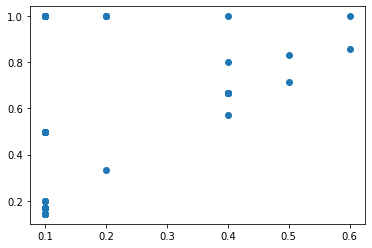

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(rules.support,rules.confidence)

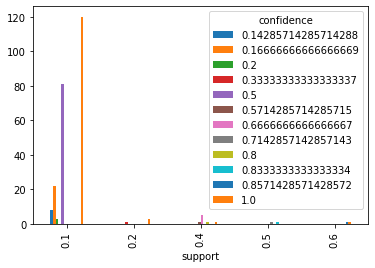

In [13]:
pd.crosstab(rules.support,rules.confidence).plot(kind="bar")

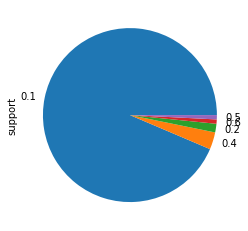

In [14]:
rules["support"].value_counts()
rules.support.value_counts().plot(kind="pie")

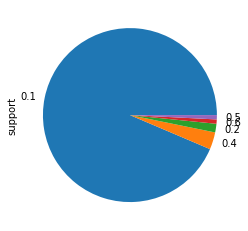

In [16]:
rules["confidence"].value_counts()
rules.support.value_counts().plot(kind="pie")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1078: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1185: UserWarning: No contour levels were found within the data range.
  **contour_kws,
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


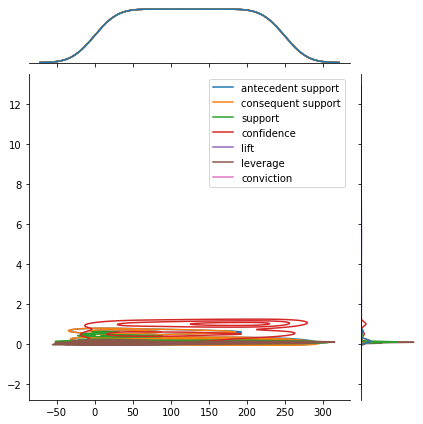

In [18]:
import seaborn as sns
sns.jointplot(X='support',Y='confidence',data=rules,kind='kde')
plt.show()

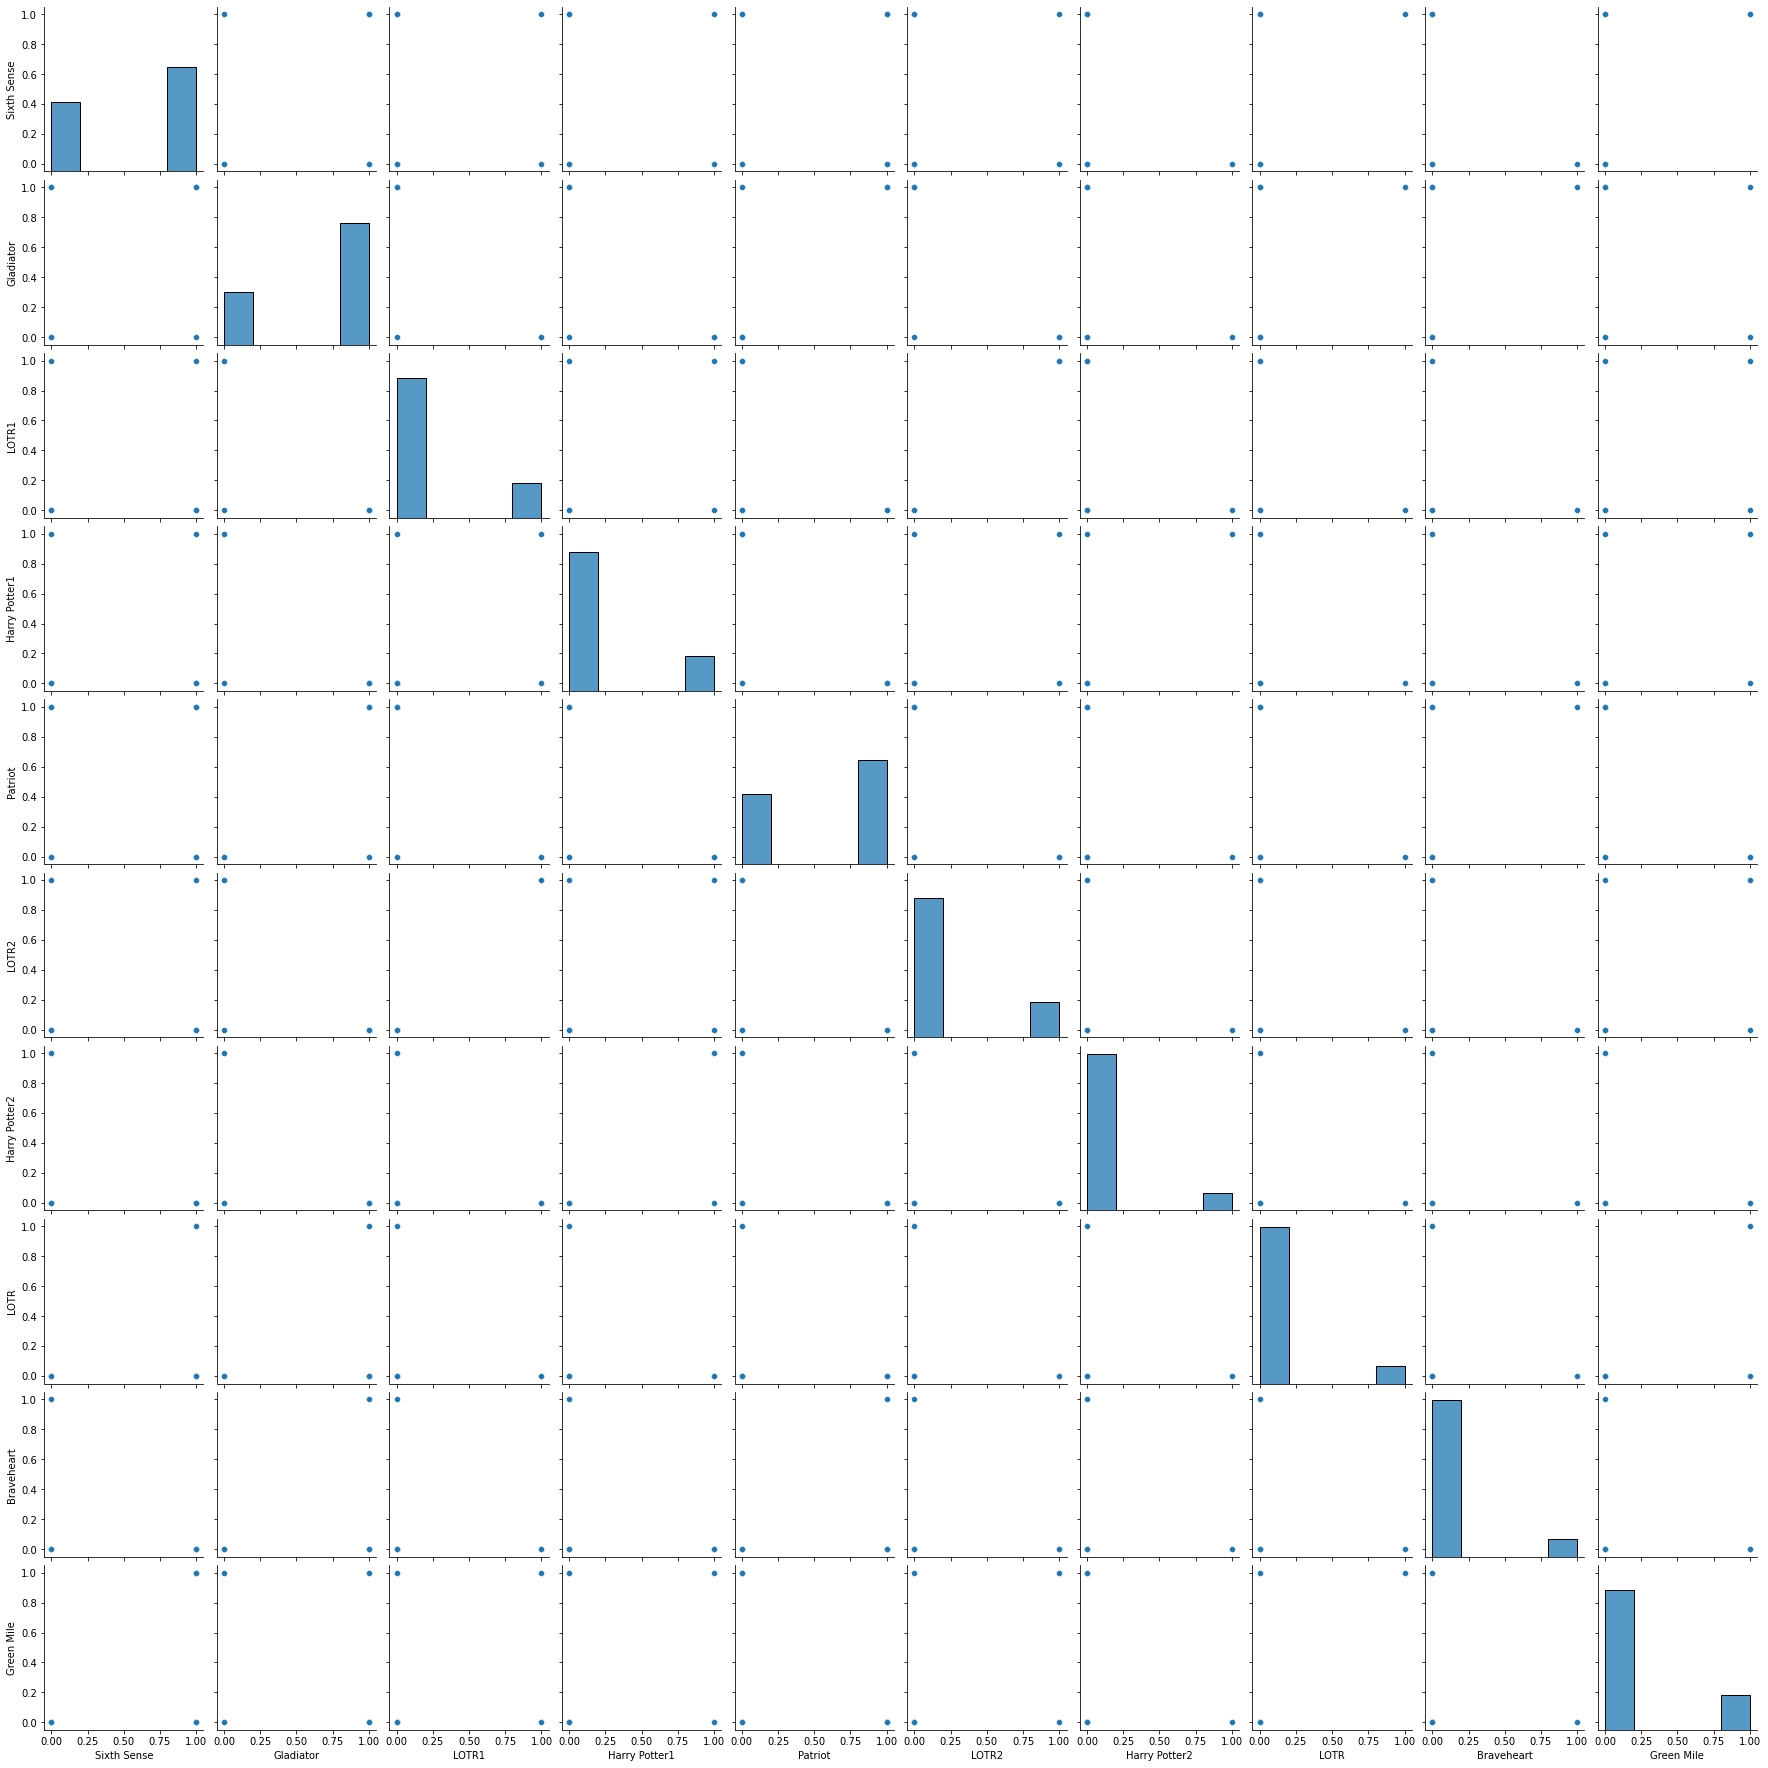

In [20]:
sns.pairplot(mymovies)
plt.show()

#### My_Movie dataset Apriori Algorithm is done min_support =0.1 is given and then association rules 'lift' type is done where min_threshold is 0.4 as taken and output is obtained for that. Than lift>1 values is been filtered form the output.